Testes  Vendas com aprendizado de máquina 


-- Preparando os dados 
SELECT 
    Isnull(D2_EMISSAO,'20000101') AS data_venda,
    Isnull(D2_CLIENTE,'XXXXXX') AS cliente,
    Isnull(D2_PRCVEN,0) AS valor_venda,
    Isnull(D2_QUANT,0) AS quantidade_venda
FROM 
    SD2010 
WHERE 
    D2_EMISSAO BETWEEN '20230101' AND '20231231'
ORDER BY 
    D2_EMISSAO;


Erro Médio Quadrático: 416335047.4833345
Erro Médio Absoluto: 262.7340349994232
R^2: -1.4675248742879177e-05
Coeficiente: [-0.00176011]
Intercepto: 98.00338798322996


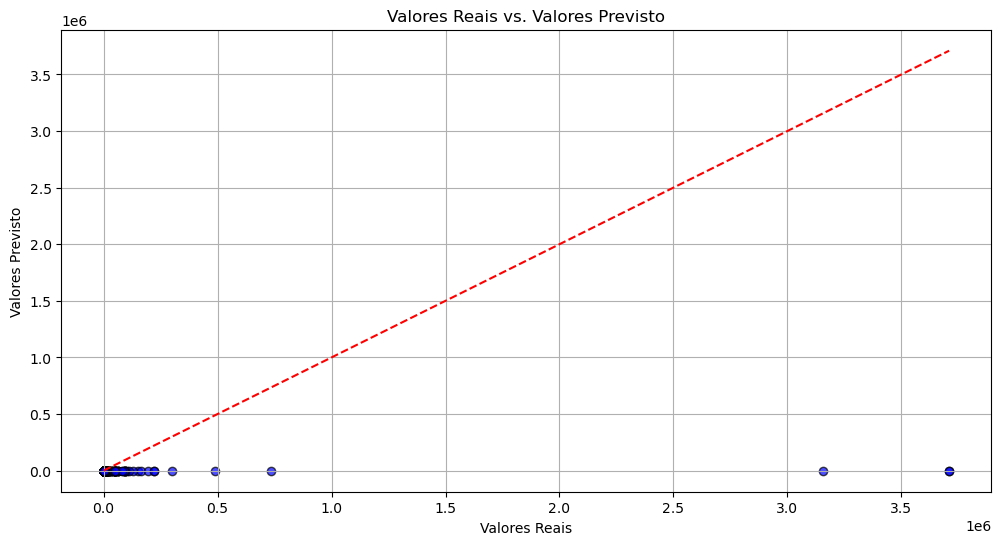

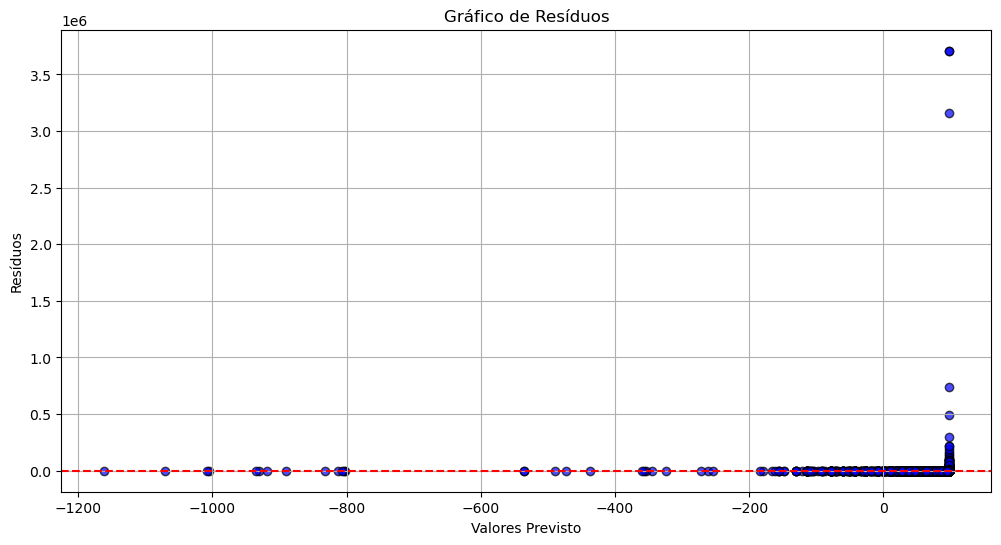

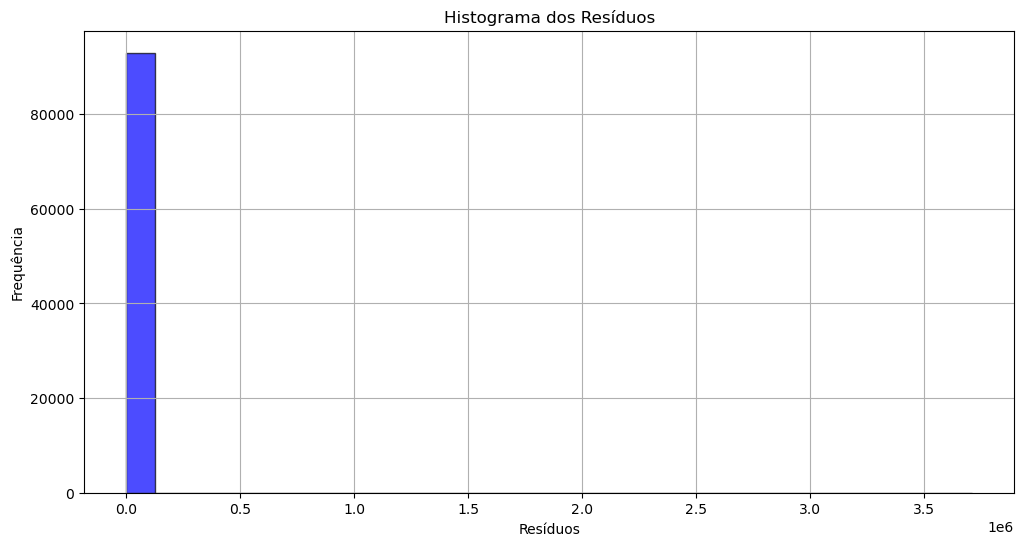

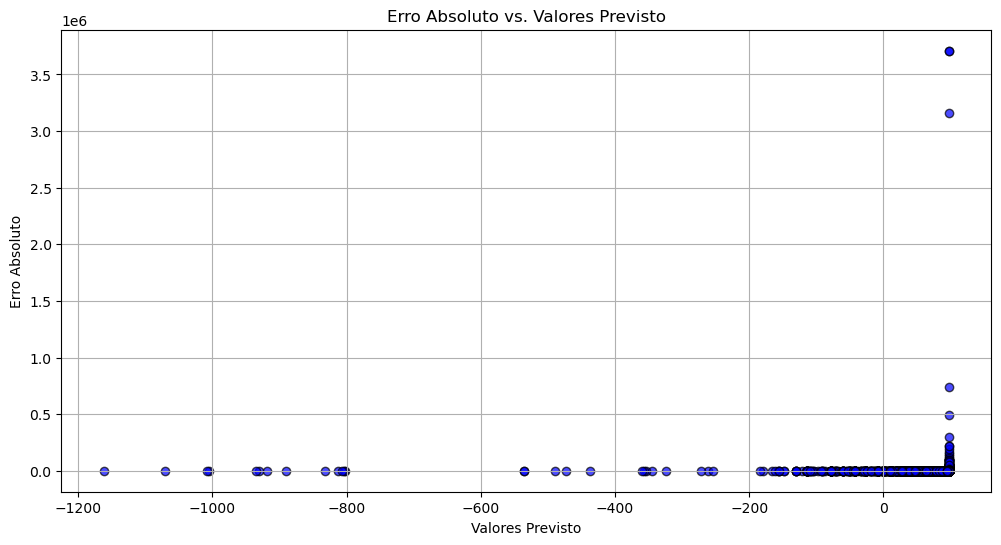

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

# Carregar os dados
df = pd.read_csv('E:/Dados/Excel/teste.csv', delimiter=';', on_bad_lines='skip')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Converter vírgulas em pontos e mudar o tipo de dados para float
df['quantidade_venda'] = df['quantidade_venda'].str.replace(',', '.').astype(float)
df['valor_venda'] = df['valor_venda'].str.replace(',', '.').astype(float)

# Preparar os dados
X = df[['quantidade_venda']]
y = df['valor_venda']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Erro Médio Quadrático: {mse}')
print(f'Erro Médio Absoluto: {mae}')
print(f'R^2: {r2}')
print(f'Coeficiente: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

# Gráfico de Dispersão: Valores reais vs. previstos
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previsto')
plt.title('Valores Reais vs. Valores Previsto')
plt.grid(True)
plt.show()

# Gráfico de Resíduos
residuals = y_test - predictions

plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previsto')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.grid(True)
plt.show()

# Histograma dos Resíduos
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.grid(True)
plt.show()

# Gráfico de Erros Absolutos vs. Valores Previsto
abs_errors = abs(residuals)

plt.figure(figsize=(12, 6))
plt.scatter(predictions, abs_errors, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Valores Previsto')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto vs. Valores Previsto')
plt.grid(True)
plt.show()


Epoch 1/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 2/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 3/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 4/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 5/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 6/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 7/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 8/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 9/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 10/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 11/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 12/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 13/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 14/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 15/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 16/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 17/100 - Erro Médio Quadrático: 416335047.4833345
Epoch 18/100 - Erro Médio Quadrático: 416335047.4833345
E

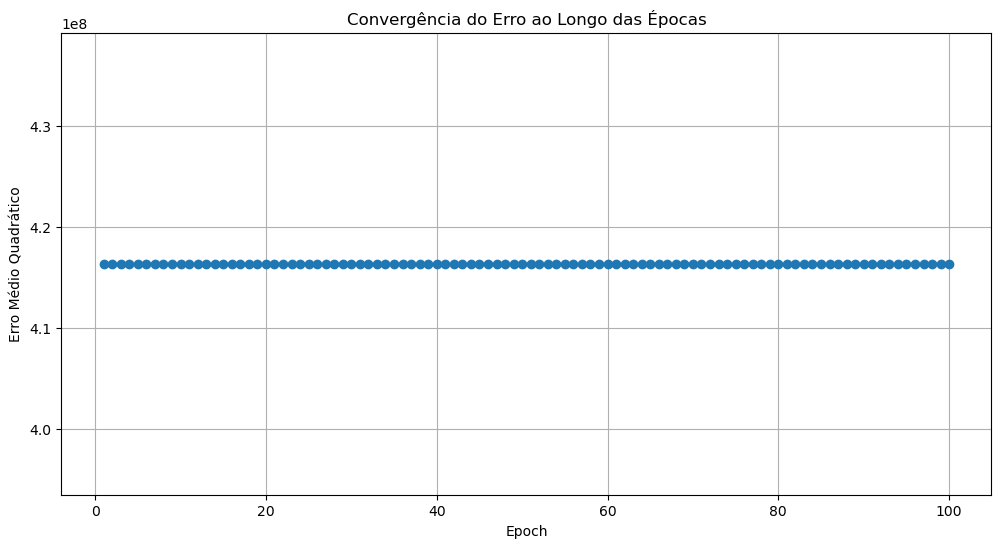

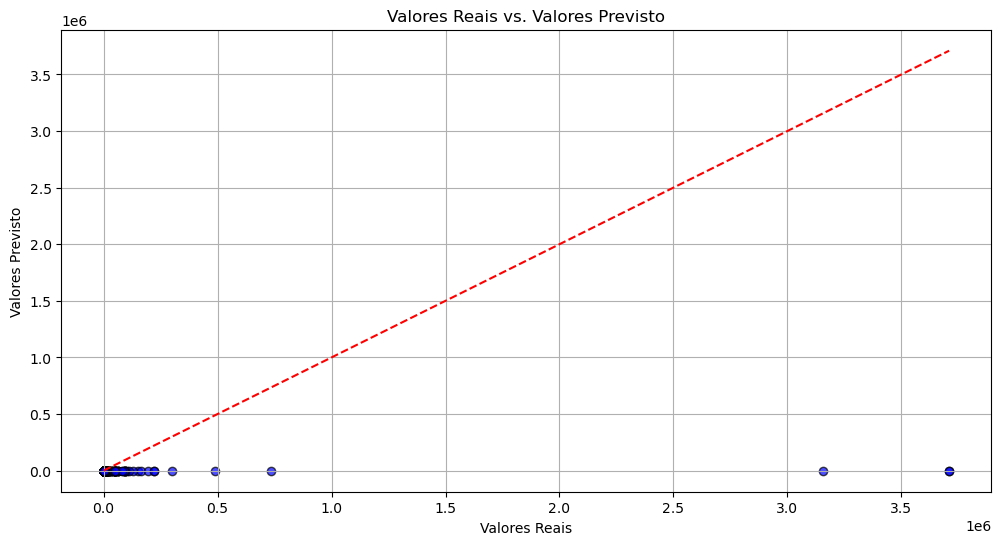

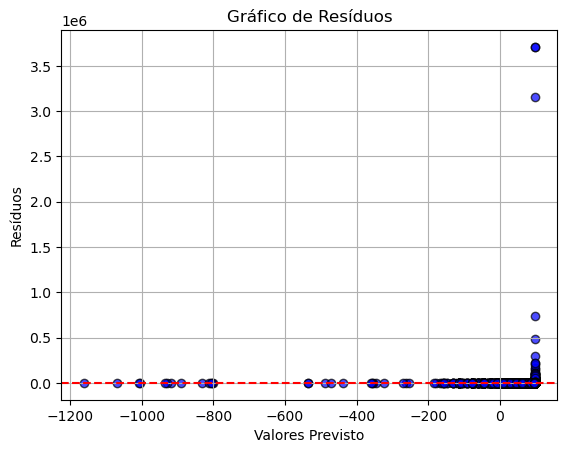

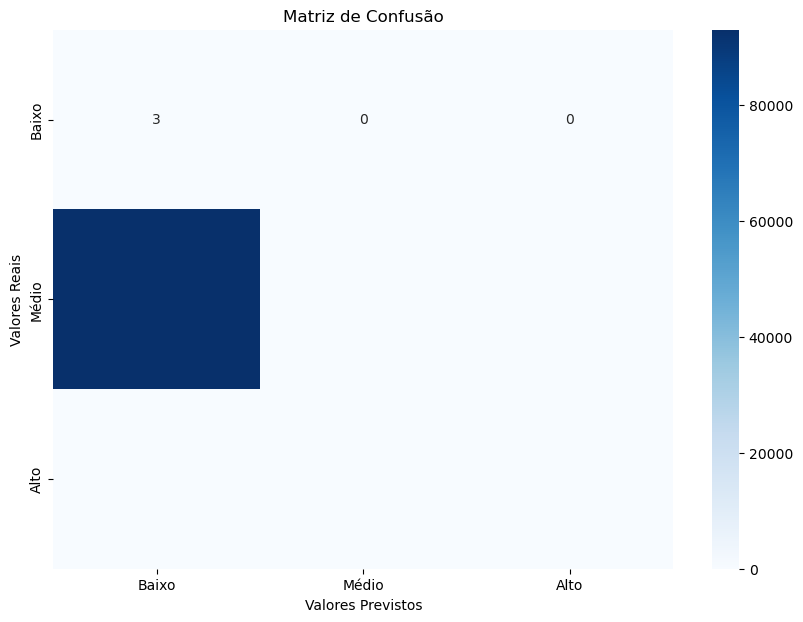

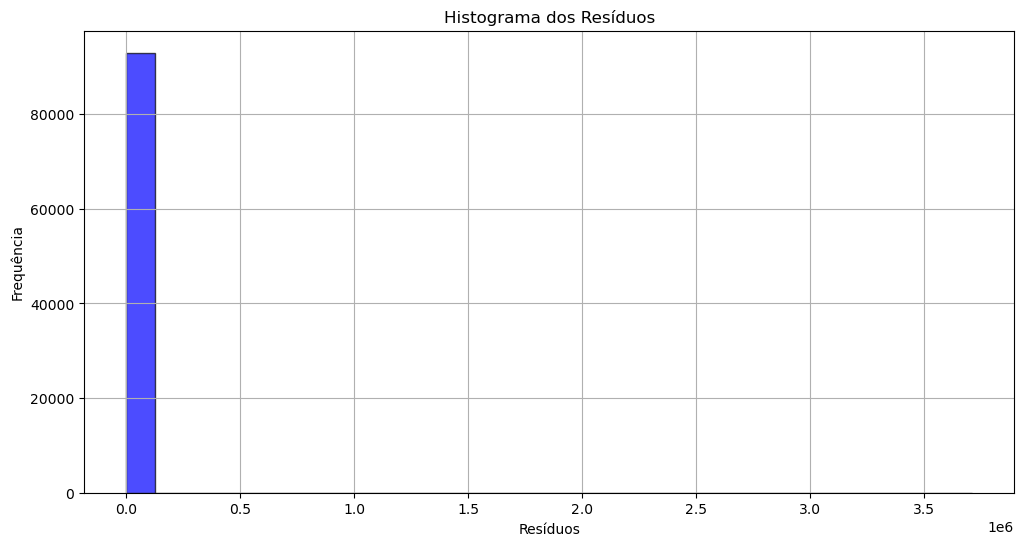

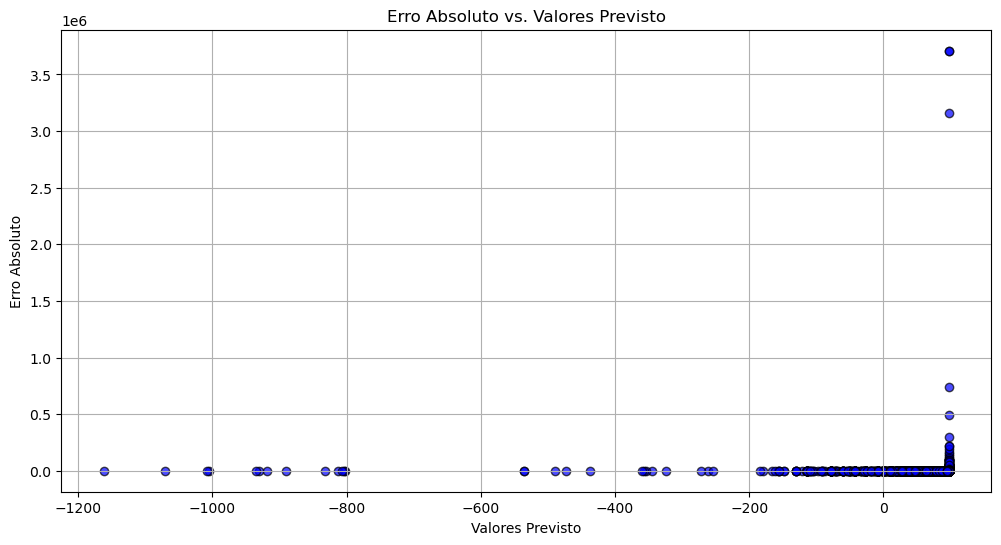

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carregar os dados
df = pd.read_csv('E:/Dados/Excel/teste.csv', delimiter=';', on_bad_lines='skip')

# Remover espaços extras dos nomes das colunas
df.columns = df.columns.str.strip()

# Converter vírgulas em pontos e mudar o tipo de dados para float
df['quantidade_venda'] = df['quantidade_venda'].str.replace(',', '.').astype(float)
df['valor_venda'] = df['valor_venda'].str.replace(',', '.').astype(float)

# Preparar os dados
X = df[['quantidade_venda']]
y = df['valor_venda']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo
model = LinearRegression()

# Definir o número de epochs (iterações)
epochs = 100
errors = []

# Treinar o modelo por várias épocas
for epoch in range(epochs):
    model.fit(X_train, y_train)
    
    # Fazer previsões
    predictions = model.predict(X_test)
    
    # Avaliar o modelo
    mse = mean_squared_error(y_test, predictions)
    errors.append(mse)
    print(f'Epoch {epoch+1}/{epochs} - Erro Médio Quadrático: {mse}')

# Avaliar o modelo final
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'\nErro Médio Absoluto: {mae}')
print(f'R^2: {r2}')
print(f'Coeficiente: {model.coef_}')
print(f'Intercepto: {model.intercept_}')

# Gráfico de convergência do erro
plt.figure(figsize=(12, 6))
plt.plot(range(1, epochs + 1), errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Erro Médio Quadrático')
plt.title('Convergência do Erro ao Longo das Épocas')
plt.grid(True)
plt.show()

# Gráfico de Dispersão: Valores reais vs. previstos
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previsto')
plt.title('Valores Reais vs. Valores Previsto')
plt.grid(True)
plt.show()

# Gráfico de Resíduos
residuals = y_test - predictions

#plt.figure(figsize(12, 6))
plt.scatter(predictions, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previsto')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.grid(True)
plt.show()


from sklearn.metrics import confusion_matrix

# Transformar as previsões e os valores reais em categorias (exemplo simples)
y_test_class = pd.cut(y_test, bins=3, labels=["Baixo", "Médio", "Alto"])
predictions_class = pd.cut(predictions, bins=3, labels=["Baixo", "Médio", "Alto"])

# Criar a matriz de confusão
cm = confusion_matrix(y_test_class, predictions_class)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Baixo", "Médio", "Alto"], yticklabels=["Baixo", "Médio", "Alto"])
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()



# Histograma dos Resíduos
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.grid(True)
plt.show()

# Gráfico de Erros Absolutos vs. Valores Previsto
abs_errors = abs(residuals)

plt.figure(figsize=(12, 6))
plt.scatter(predictions, abs_errors, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Valores Previsto')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto vs. Valores Previsto')
plt.grid(True)
plt.show()
